In [1]:
# import pandas as pd
import matplotlib.pyplot as plt
import os, glob
import pandas as pd

In [15]:
dirs = ["auc/after_r", "auc/after_u", "auc/after_mc",
        "auc/before_r", "auc/before_u", "auc/before_mc",
        "auc/old_before_r", "auc/old_before_u", "auc/old_before_mc"]

# dirs = ["auc/after_r", "auc/after_u",
#         "auc/before_r", "auc/before_u",
#         "auc/old_before_r", "auc/old_before_u", "mc_test"]

In [16]:
results_dict = {}
for d in dirs:
    try:
        if "/" in d:
            _d = d.split("/")[-1]
        else:
            _d = d
        results_dict[_d] = pd.concat([
             pd.read_csv(x) for x in glob.glob(os.path.join("../results", d, "active_train_log_*.csv"))
         ]).drop_duplicates()
    except:
        print(d)

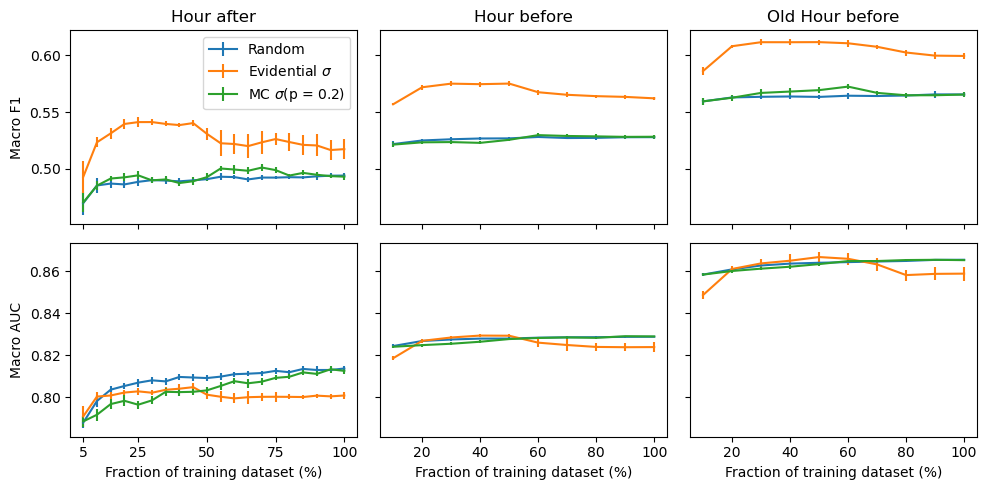

In [24]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 5), sharex = "col", sharey = "row")

df = results_dict["after_r"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][0].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][0].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
df = results_dict["after_u"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][0].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][0].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
df = results_dict["after_mc"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][0].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][0].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
axs[1][0].set_xticks([0, 4, 9, 14, 19])
axs[1][0].set_xticklabels([5, 25, 50, 75, 100])


df = results_dict["before_r"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][1].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][1].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
df = results_dict["before_u"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][1].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][1].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
df = results_dict["before_mc"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][1].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][1].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
axs[1][1].set_xticks([1, 3, 5, 7, 9])
axs[1][1].set_xticklabels([20, 40, 60, 80, 100])

df = results_dict["old_before_r"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][2].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][2].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
df = results_dict["old_before_u"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][2].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][2].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
df = results_dict["old_before_mc"].groupby("iteration")
df_mu, df_std = df.mean(), df.std()
axs[0][2].errorbar(df_mu.index, df_mu["test_ave_f1"], yerr = df_std["test_ave_f1"])
axs[1][2].errorbar(df_mu.index, df_mu["test_auc"], yerr = df_std["test_auc"])
axs[1][2].set_xticks([1, 3, 5, 7, 9])
axs[1][2].set_xticklabels([20, 40, 60, 80, 100])


axs[0][0].set_ylabel("Macro F1")
axs[1][0].set_ylabel("Macro AUC")
_ = [axx.set_xlabel("Fraction of training dataset (%)") for axx in axs[1]]

axs[0][0].set_title("Hour after")
axs[0][1].set_title("Hour before")
axs[0][2].set_title("Old Hour before")

axs[0][0].legend(["Random", r"Evidential $\sigma$", "MC $\sigma$(p = 0.2)"])
plt.tight_layout()